In [13]:
import sys
import pandas as pd
import numpy as np

In [10]:
#COVID-CT Reports
COVIDxl= pd.ExcelFile('/Users/yangs/Desktop/Shuang/phd courses/2021spring/BME6938_multimodal/final project/COVID-CT-master/COVID-CT-MetaInfo.xlsx')
COVIDxl.sheet_names

for sheet in COVIDxl.sheet_names:
    file= pd.read_excel(COVIDxl,sheet_name= sheet, usecols="H, K")
    file.to_csv(sheet + '.txt', header= True, index= False)

In [7]:
import collections
import matplotlib.pyplot as plt
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('positive_captions.txt', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt', encoding="utf8"))
stopwords = stopwords.union(set(['Figure', 'Patient', 'China', 'Wuhan', 'Beijing']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()


How many most common words to print: 1000

OK. The 1000 most common words are as follows

glass :  187
ground :  175
consolidation :  148
bilateral :  133
lesions :  120
opacity :  105
opacities :  99
ground-glass :  97
patchy :  85
severe :  61
shadow :  54
ggo :  54
pleura :  45
pneumonia :  42
shadows :  42
thickening :  37
subpleural :  33
blood :  31
mild :  26
diffuse :  23
pattern :  20
pleural :  20
paving :  19
nodular :  16
mass :  15
abnormalities :  13
levels :  12
crazy-paving :  9
flow :  8
examination :  8
count :  8
test :  8
fuzzy :  8
pneumoniae :  8
fibrous :  8
patches :  8
flaky :  8
leaf-like :  7
vacuoles :  7
cystic :  7
experienced :  6
had :  6
such :  6
detection :  6
confirmed :  6
ground- :  6
stroma :  6
weakness :  5
body :  5
cell :  5
complete :  5
tumorous :  5
crazy :  5
tightness :  4
unproductive :  4
pain :  4
one :  4
week :  4
presentation :  4
temperatures :  4
ranging :  4
372oc :  4
40oc :  4
dizziness :  4
given :  4
noninvasive :  4
ventilat

/Users/yangs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yangs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


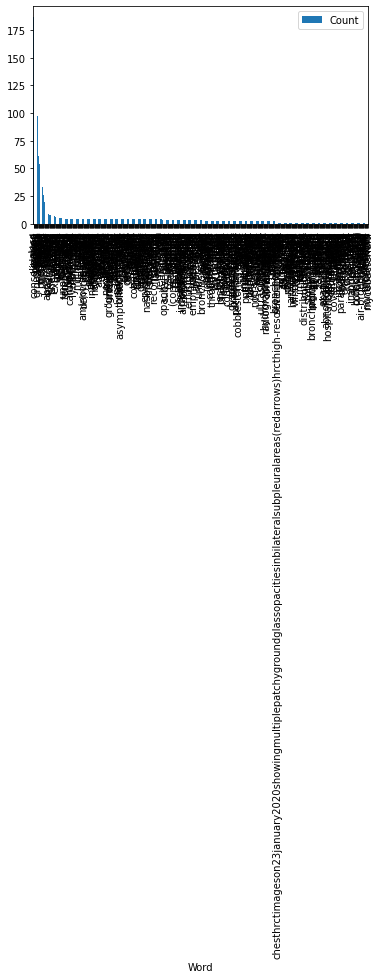

In [11]:
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df_rank = pd.DataFrame(lst, columns = ['Word', 'Count'])
df_rank.plot.bar(x='Word',y='Count')


In [14]:
number_of_words = df_rank.shape[0]
#number_of_words 611
df_rank['word_index'] = list(np.arange(number_of_words)+1)

In [15]:
df_rank

,Word,Count,word_index
0,glass,187,1
1,ground,175,2
2,consolidation,148,3
3,bilateral,133,4
4,lesions,120,5
...,...,...,...
605,incidentally,1,606
606,noted,1,607
607,ntm,1,608
608,nontuberculous,1,609


In [16]:
word_dict=df_rank.set_index('Word')['word_index'].to_dict()

In [20]:
df = pd.read_excel (r'/Users/yangs/Desktop/Shuang/phd courses/2021spring/BME6938_multimodal/final project/COVID-CT-master/COVID-CT-MetaInfo.xlsx')

In [23]:
df['Severity_Group'] = np.where(df['Severity'].str.contains("Severe"or "mortality" or "Serious" or "critical" or "severe" or "Mortality" or "Critical" or "serious"), '1', '0')

In [24]:
df.head(2)

,File name,Patient ID,Age,Gender,Location,Medical history,Time,Severity,Other diseases,DOI,Captions,Severity_Group
0,2020.01.24.919183-p27-132.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,"Chest tightness, unproductive cough, pain and ...",NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....,1
1,2020.01.24.919183-p27-133.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,"Chest tightness, unproductive cough, pain and ...",NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....,1


In [25]:
df['Severity_Group'].value_counts()

1    178
0    172
Name: Severity_Group, dtype: int64

In [26]:
import nltk
from nltk.tokenize import word_tokenize

In [27]:
df['Captions'] = df['Captions'].astype('str') 
df['Captions_token']= df['Captions'].apply(word_tokenize)

In [31]:
def word_index(df, col='Captions',dictionary=word_dict):
    word_index=[]
    for item in df[col]:
        wtoken=word_tokenize(item)
        mp = list(map(dictionary.get, wtoken))
        my_list = [ 0 if i is None else i for i in mp]
        #my_array = np.array(my_list)
        #print(my_array)
        word_index.append(my_list )
        #word_index=pd.concat([word_index, my_array])
    return word_index

In [32]:
token_lst= word_index(df, col='Captions',dictionary=word_dict)

In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers


In [36]:
data_array = np.array(token_lst)

<ipython-input-36-bfc7fda79874>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_array = np.array(token_lst)


In [37]:
np.unique(df['Severity_Group'])

array(['0', '1'], dtype=object)

In [39]:
len(np.unique(np.hstack(data_array)))

275

In [40]:
length = [len(i) for i in data_array]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 56.22857142857143
Standard Deviation: 45


In [74]:
def vectorize(sequences, dimension = 650):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [75]:
data_vec=vectorize(data_array, dimension = 650)
targets = np.array(df['Severity_Group']).astype("float32")

In [76]:
test_x = data_vec[:105]
test_y = targets[:105]
train_x = data_vec[105:]
train_y = targets[105:]

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [91]:
model = keras.Sequential()

In [92]:
# Input - Layer
model.add(layers.Dense(20, activation = "relu", input_shape=(650, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(20, activation = "relu"))

model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(20, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 20)                13020     
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
Total params: 13,881
Trainable params: 13,881
Non-trainable params: 0
__________________________________________________

In [93]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [94]:
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 50,
 validation_data = (test_x, test_y)
)

Epoch 1/2
5/5 [==============================] - 0s 31ms/step - loss: 0.6947 - accuracy: 0.4760 - val_loss: 0.6917 - val_accuracy: 0.4095
Epoch 2/2
5/5 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6292 - val_loss: 0.7091 - val_accuracy: 0.2667


In [95]:
print("Test-Accuracy:", np.mean(results.history["val_accuracy"]))

Test-Accuracy: 0.3380952477455139
